In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error

# utility
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils.testing import ignore_warnings

# Study Case 3
aplikasikan feature engineering yang sudah dipelajari ke dalam model
* Part 3 = Decision tree regressor 
>* one hot encoding = sex, smoker, time
>* ordinal encoding  = day,time
>* no treatment     = size, total_bil

In [2]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Data Preprocessing

In [3]:
ordinal_mapping = [{'col':'day','mapping':{None:0,'Thur':1,'Fri':2,'Sat':3,'Sun':4}},
                  {'col':'time','mapping':{None:0,'Lunch':1,'Dinner':2}}]
ordinal_encoder = ce.OrdinalEncoder(mapping=ordinal_mapping)

In [4]:
transformer = ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['sex','smoker','time']),
    ('ordinal',ordinal_encoder,['day','time'])
],remainder='passthrough')

## Data Splittng

In [5]:
X=tips.drop('tip',axis=1)
y=tips['tip']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                random_state=10)

## Data Transform

In [7]:
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.fit_transform(X_test)

Rename Column

In [8]:
X_train_trans = pd.DataFrame(X_train_trans)
X_test_trans = pd.DataFrame(X_test_trans)

In [9]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [10]:
transformer.transformers_[1][1].get_feature_names()

['day', 'time']

In [11]:
features = list(transformer.transformers_[0][1].get_feature_names())+transformer.transformers_[1][1].get_feature_names()+['size','total_bill']

In [12]:
X_train_trans.columns = features
X_test_trans.columns = features

## Model Fitting and Evaluation

In [13]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train_trans,y_train)

DecisionTreeRegressor(max_depth=3)

In [14]:
y_pred = model.predict(X_test_trans)
print('mse score =',mean_squared_error(y_test,y_pred))

mse score = 0.8414314225960586


## Model Properties

In [15]:
importance_table  = pd.DataFrame({
    'imp':model.feature_importances_
}, index=features)

<AxesSubplot:>

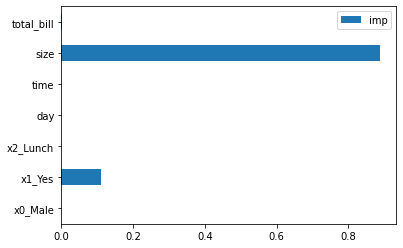

In [16]:
importance_table.plot(kind='barh')

Berdasarkan grafik diatas, features yang paling mempengaruhi besarnya pemberian tips adalah feature total bill

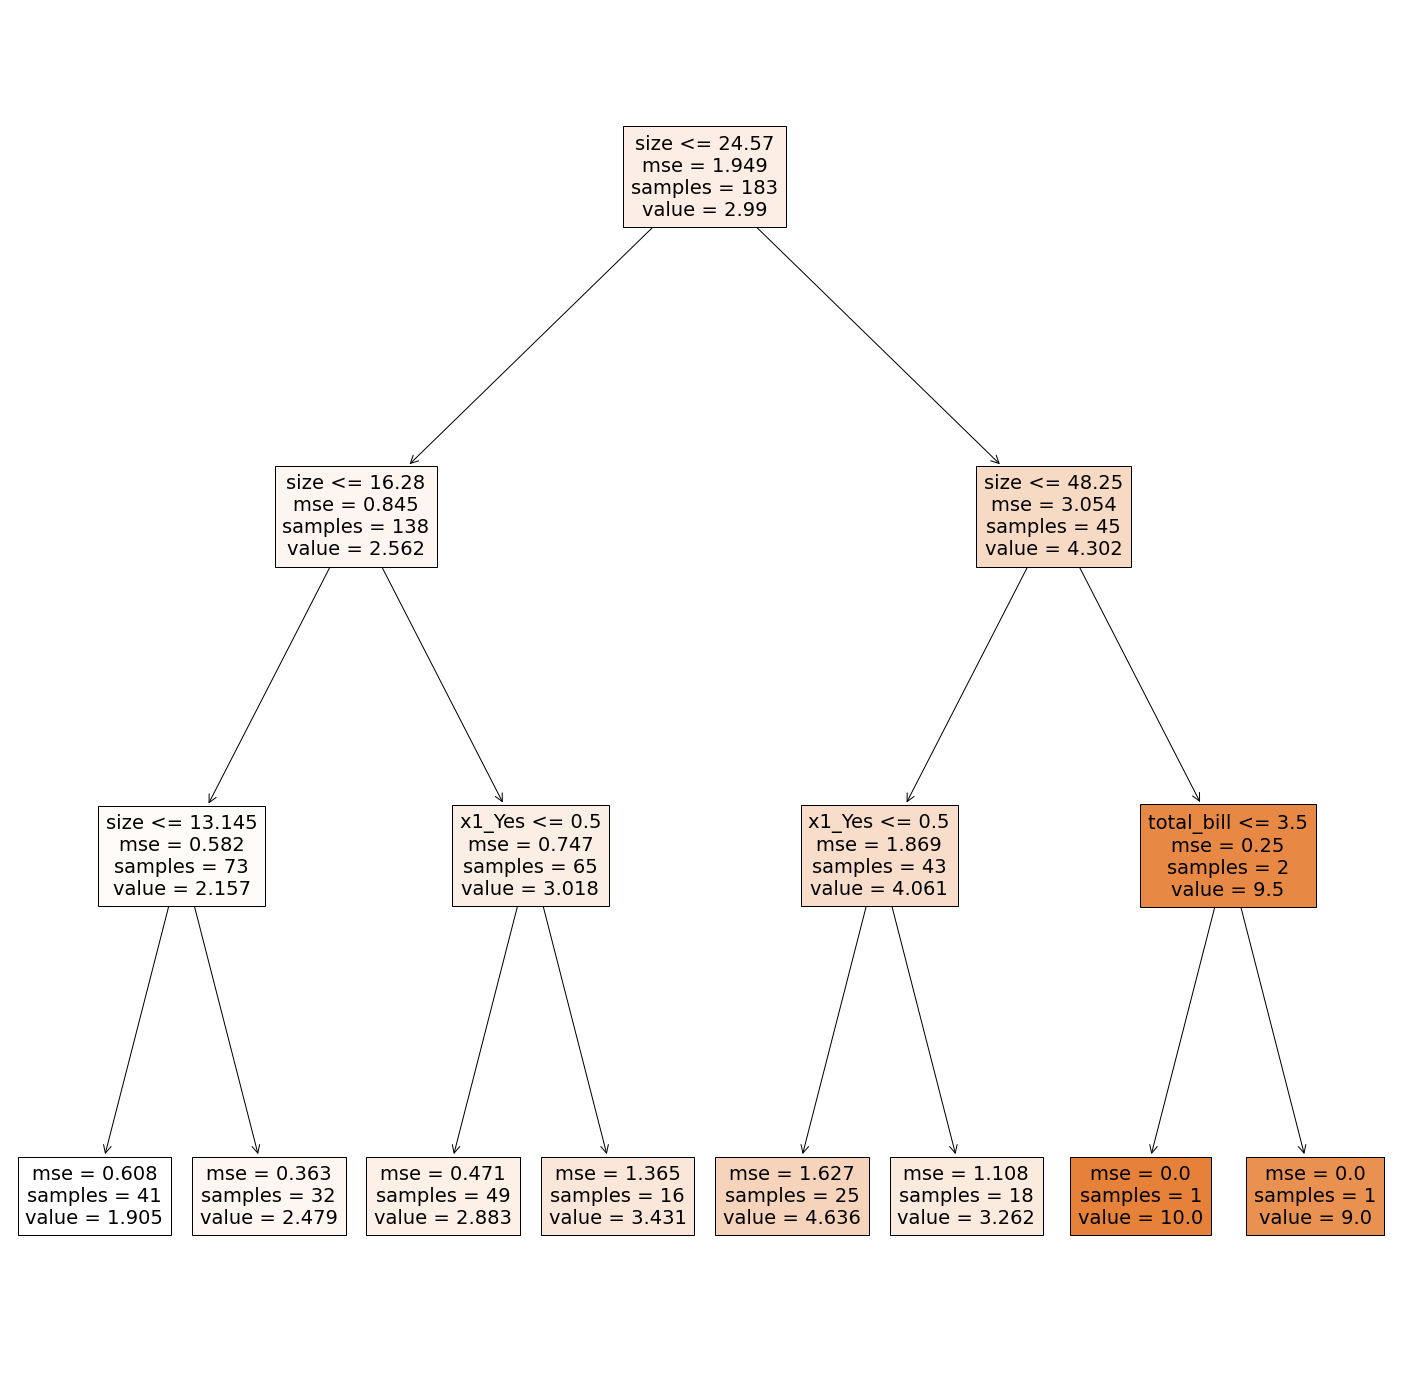

In [17]:
plt.figure(figsize=(25,25))
plot_tree(model,feature_names=features, filled= True)
plt.show()